In [ ]:
!pip install -q rpy2

In [ ]:
%load_ext rpy2.ipython

# Visualization with ggplot2

### ggplot2 has several advantages:

Plot specification at a high level of abstraction, Very flexible, Theme system for polishing plot appearance, Mature and complete graphics system, Many users, active mailing list, Lot's of online help available (StackOverflow, etc...). ggplot2 also has great [documentation](https://http://docs.ggplot2.org/current/)!


### Layers for building Visualizations
ggplot2 is based off the grammar of graphics, which sets a paradigm for data visualization in layers: [Layers for building Visualizations](https://https://media.geeksforgeeks.org/wp-content/uploads/20211207130952/NikhilImageedit1.jpg)

In [ ]:
%%R

# import ggplot2
library(ggplot2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
%%R

library(data.table)
df <- read.csv('/content/drive/MyDrive/Colab Notebooks/ml r/02 Programming with R/state_real_estate_data.csv')

In [ ]:
%%R

head(df)

In [ ]:
%%R

tail(df)

In [ ]:
%%R

str(df)

In [ ]:
%%R

summary(df)


# Histograms with ggplot2

In [ ]:
%%R

library(ggplot2)

In [ ]:
%%R

install.packages("ggplot2movies")
library(ggplot2movies)
data("movies")

In [ ]:
%%R

df <- movies

In [ ]:
%%R

head(df)

In [ ]:
%%R

df <- movies <- movies[sample(nrow(movies), 1000), ]

## Using qplot()

In [ ]:
%%R

qplot(rating,data=df,geom='histogram',binwidth=0.1,alpha=0.8)


## Using ggplot()

In [ ]:
%%R

# ggplot(data, aesthetics)
pl <- ggplot(df,aes(x=rating))

In [ ]:
%%R

# Add Histogram Geometry
pl + geom_histogram()

## Adding Color

In [ ]:
%%R

pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(binwidth=0.1,color='red',fill='pink')

## Adding Labels

In [ ]:
%%R

pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(binwidth=0.1,color='red',fill='pink') + xlab('Movie Ratings')+ ylab('Occurences') + ggtitle(' Movie Ratings')

## Change Alpha (Transparency)

In [ ]:
%%R

pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(binwidth=0.1,fill='blue',alpha=0.4) + xlab('Movie Ratings')+ ylab('Occurences')

## Linetypes

We have the options: "blank", "solid", "dashed", "dotted", "dotdash", "longdash", and "twodash". You would never really use these with a histogram, but just to show your options

In [ ]:
%%R

pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(binwidth=0.1,color='blue',fill='pink',linetype='dotted') + xlab('Movie Ratings')+ ylab('Occurences')

## Advanced Aesthetics
We can add a aes() argument to the geom_histogram for some more advanced features. We won't go too deep into these, but ggplot gives you the ability to edit color and fill scales.

In [ ]:
%%R

# Adding Labels
pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(binwidth=0.1,aes(fill=..count..)) + xlab('Movie Ratings')+ ylab('Occurences')

In [ ]:
%%R

# Adding Labels
pl <- ggplot(df,aes(x=rating))
pl2 <- pl + geom_histogram(binwidth=0.1,aes(fill=..count..)) + xlab('Movie Ratings')+ ylab('Occurences')

In [ ]:
%%R

# scale_fill_gradient('Label',low=color1,high=color2)
pl2 + scale_fill_gradient('Count',low='blue',high='red')

In [ ]:
%%R

# scale_fill_gradient('Label',low=color1,high=color2)
pl2 + scale_fill_gradient('Count',low='darkgreen',high='lightblue')

## Adding density plot


In [ ]:
%%R

# Adding Labels
pl <- ggplot(df,aes(x=rating))
pl + geom_histogram(aes(y=..density..)) + geom_density(color='red')

# Scatterplots with ggplot2
Scatter plots allow us to place points that let us see possible correlations between two features of a data set.

In [ ]:
%%R

library('ggplot2')
df <- mtcars

In [ ]:
%%R

head(df)

## qplot()

In [ ]:
%%R

qplot(wt,mpg,data=df)

## Adding a 3rd feature
We can add a third feature by adding a color gradient on each point, or by resizing each point based on their value of this 3rd feature.

In [ ]:
%%R

qplot(wt,mpg,data=df,color=cyl)

In [ ]:
%%R

qplot(wt,mpg,data=df,size=cyl)

## Or both

In [ ]:
%%R

qplot(wt,mpg,data=df,size=cyl,color=cyl)

In [ ]:
%%R

# Show 4 features (this gets messy)
qplot(wt,mpg,data=df,size=cyl,color=hp,alpha=0.6)

## ggplot()

In [ ]:
%%R

pl <- ggplot(data=df,aes(x = wt,y=mpg))
pl + geom_point()

## Adding 3rd

In [ ]:
%%R

pl <- ggplot(data=df,aes(x = wt,y=mpg))
pl + geom_point(aes(color=cyl))

In [ ]:
%%R

pl <- ggplot(data=df,aes(x = wt,y=mpg))

pl + geom_point(aes(color=factor(cyl)))

In [ ]:
%%R

pl <- ggplot(data=df,aes(x = wt,y=mpg))

pl + geom_point(aes(size=factor(cyl)))

In [ ]:
%%R

# With Shapes
pl <- ggplot(data=df,aes(x = wt,y=mpg))

pl + geom_point(aes(shape=factor(cyl)))

In [ ]:
%%R

# Better version
# With Shapes
pl <- ggplot(data=df,aes(x = wt,y=mpg))

pl + geom_point(aes(shape=factor(cyl),color=factor(cyl)),size=4,alpha=0.6)

## Gradient Scales

In [ ]:
%%R

pl + geom_point(aes(colour = hp),size=4) + scale_colour_gradient(high='red',low = "blue")

# Barplots with ggplot2
Barplots are a useful way of displaying occurence counts when a histogram isn't quite what you're looking for! In ggplot2, there are two types of bar charts, determined by what is mapped to bar height. By default, geom_bar uses stat="count" which makes the height of the bar proportion to the number of cases in each group (or if the weight aethetic is supplied, the sum of the weights). If you want the heights of the bars to represent values in the data, use stat="identity" and map a variable to the y aesthetic.

There isn't a really simple,nice way to do this with qplot, so we'll skip straigh to using ggplot.


## ggplot()

In [ ]:
%%R

library(ggplot2)
# counts (or sums of weights)
g <- ggplot(mpg, aes(class))
# Number of cars in each class:
g + geom_bar()

In [ ]:
%%R

# Bar charts are automatically stacked when multiple bars are placed
# at the same location
g + geom_bar(aes(fill = drv))

In [ ]:
%%R

g + geom_bar(aes(fill = drv), position = "fill")

In [ ]:
%%R

# You can instead dodge, or fill them
g + geom_bar(aes(fill = drv), position = "dodge")

# Boxplots with ggplot2
Boxplots are convenient way of graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

Let's see how we can create them with qplot and ggplot!

In [ ]:
%%R

library(ggplot2)
df <- mtcars
head(df)

## qplot

In [ ]:
%%R

qplot(factor(cyl), mpg, data = mtcars, geom = "boxplot")

## ggplot

In [ ]:
%%R

pl <- ggplot(mtcars, aes(factor(cyl), mpg))

pl + geom_boxplot()

In [ ]:
%%R

pl + geom_boxplot() + coord_flip()


In [ ]:
%%R

pl + geom_boxplot(aes(fill = factor(cyl)))

In [ ]:
%%R

pl + geom_boxplot(fill = "grey", color = "blue")

# 2 Variable Plotting with ggplot2

In [ ]:
%%R

library(ggplot2)
df <- movies

## qplot()

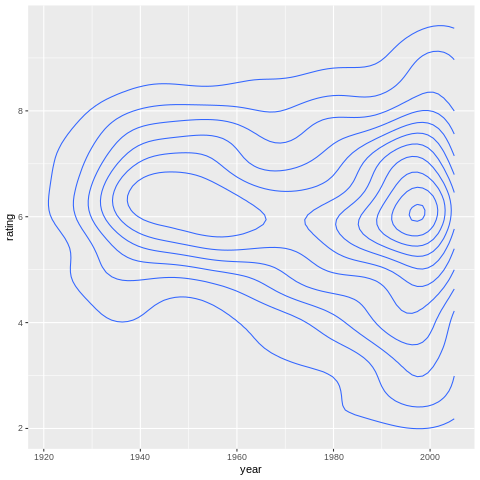

In [ ]:
%%R

qplot(x=year, y=rating, data = df, geom = "density2d")

In [ ]:
%%R

pl <- ggplot(movies,aes(x = year,y=rating))

## 2d Bin Chart

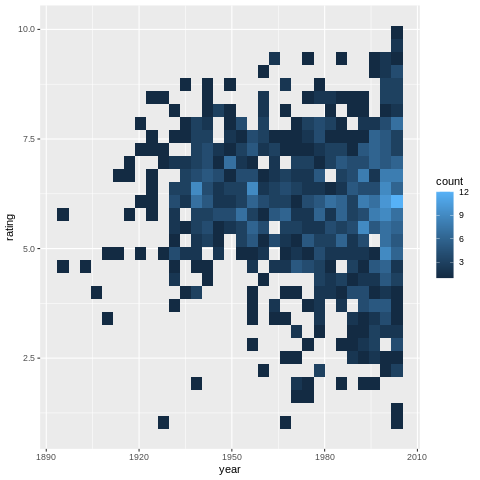

In [ ]:
%%R

pl + geom_bin2d()

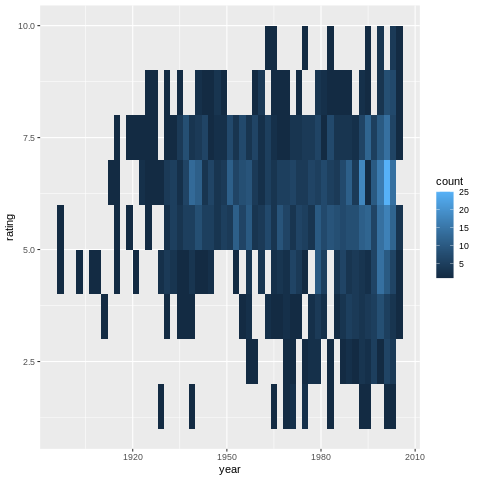

In [ ]:
%%R

# Control bin sizes
pl + geom_bin2d(binwidth=c(2,1))

## 2d Density Plot

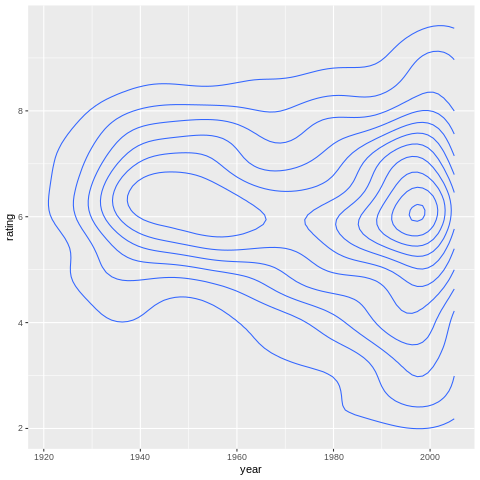

In [ ]:
%%R

pl + geom_density2d()

## 2d Hex Plot

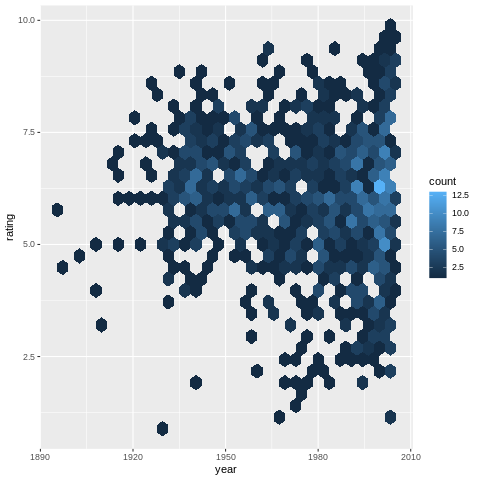

In [ ]:

%%R

pl + geom_hex()

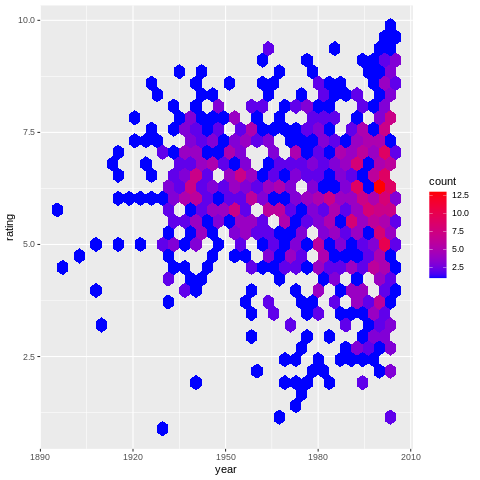

In [ ]:
%%R

pl + geom_hex() + scale_fill_gradient(high='red',low='blue')


# Coordinates and Faceting with ggplot2
Learning how to deal with coordinates will allow us to size our plots correctly. Faceting will allow us to place several plots next to each other, these plots are usually related by the same dataset.

## Basic Plot and Data

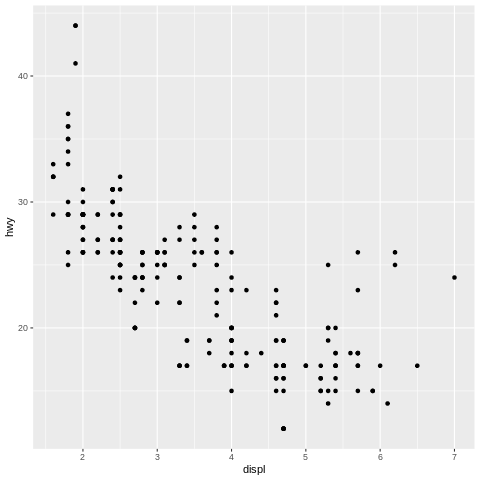

In [ ]:
%%R

library(ggplot2)
pl <- ggplot(mpg,aes(x=displ,y=hwy)) + geom_point()
pl

## Setting x and y limits
You can use + scale_x_continuous and scale_y_continuous with an additional limits=c(low,high) argument to set the scale. A sometimes nicer way to do this is by adding + coord_cartesian() with xlim and ylim arguments and pass in numeric vectors.

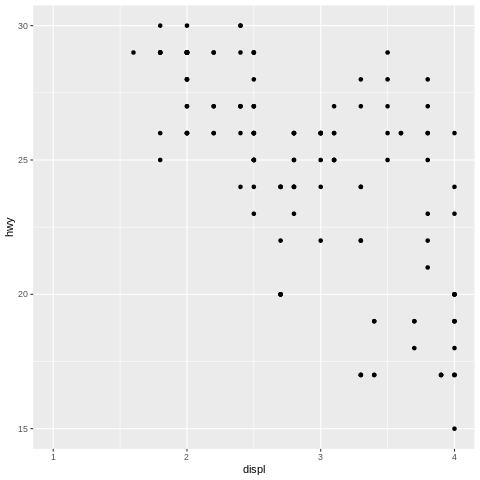

In [ ]:
%%R

pl + coord_cartesian(xlim=c(1,4),ylim=c(15,30))


## Aspect Ratios
You can use the coord_fixed() method to change the aspect ratio of a plot (default is 1:1).

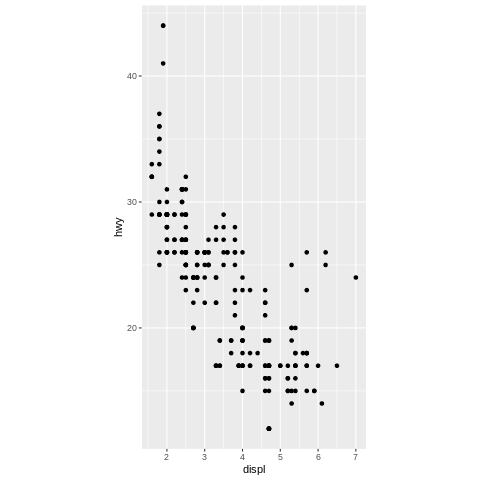

In [ ]:
%%R

# aspect ratio, expressed as y / x
pl + coord_fixed(ratio = 1/3)

## Facets
The best way to set up a facet grid (multiple plots) is to use facet_grid().
[documentation](https://http://docs.ggplot2.org/current/facet_grid.html)

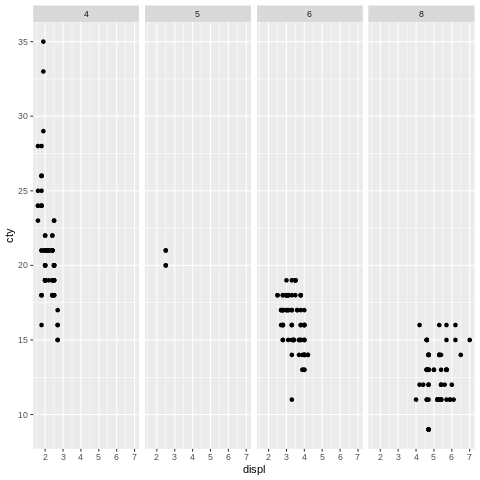

In [ ]:
%%R

p <- ggplot(mpg, aes(displ, cty)) + geom_point()

p + facet_grid(. ~ cyl)

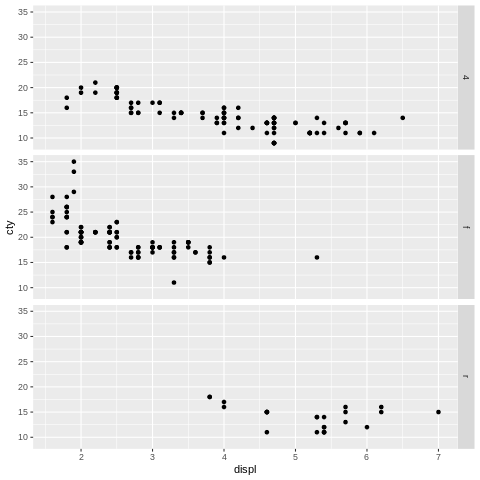

In [ ]:
%%R

p + facet_grid(drv ~ .)

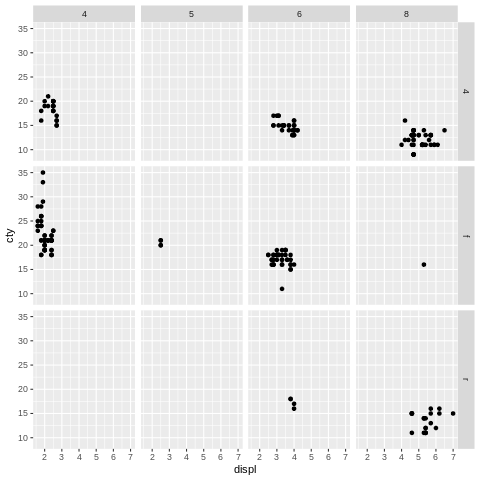

In [ ]:
%%R

p + facet_grid(drv ~ cyl)

# Themes
There are a lot of built-in themes in ggplot and you can use them in two ways, by stating before your plot to set the theme:

theme_set(theme_bw())

or by adding them to your plot directly:

my_plot + theme_bw()

In [ ]:
%%R

library(ggplot2)
df <- mtcars
head(df)

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


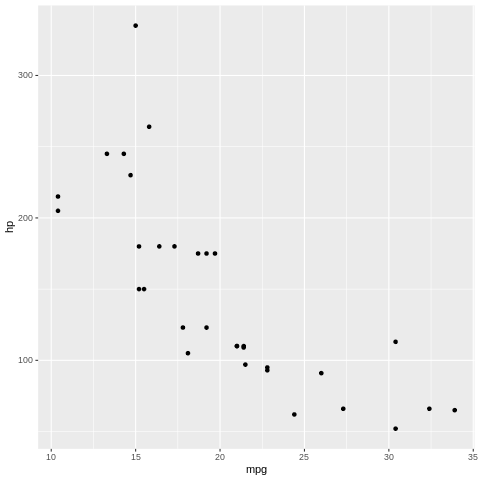

In [ ]:
%%R

pl <- ggplot(df,aes(x=mpg,y=hp)) + geom_point()
print(pl)

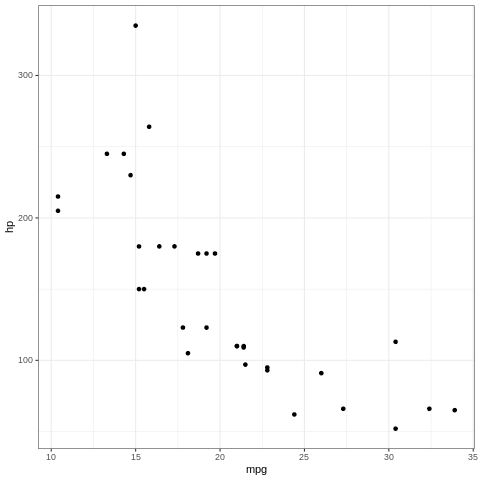

In [ ]:
%%R

pl + theme_bw()

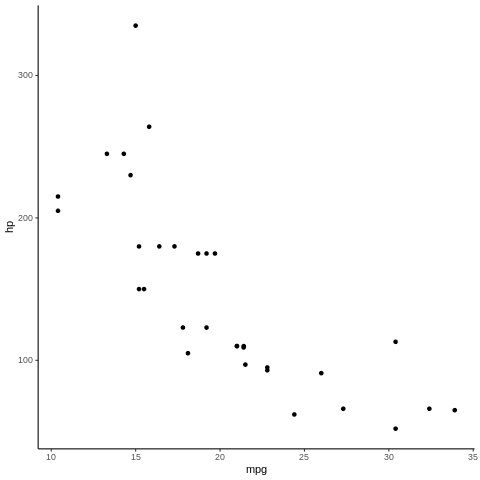

In [ ]:
%%R

pl + theme_classic()

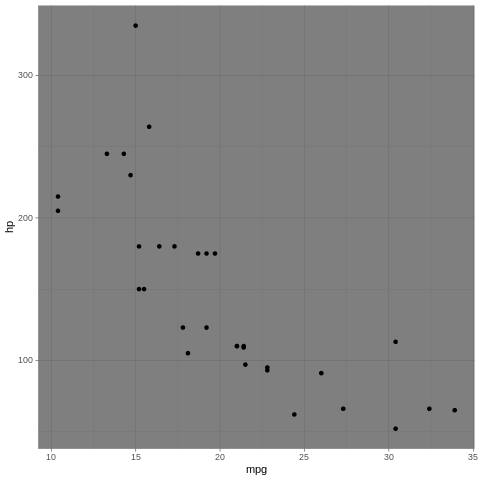

In [ ]:
%%R

pl + theme_dark()

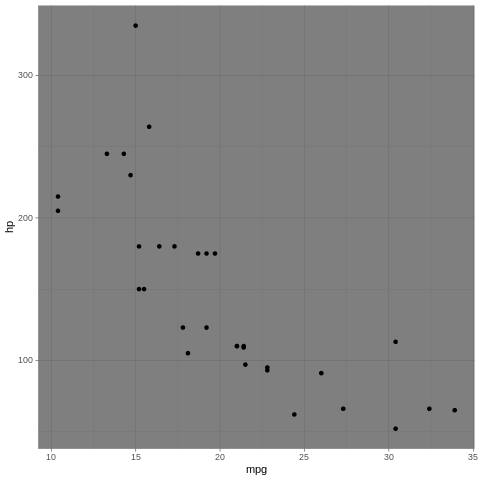

In [ ]:
%%R

pl + theme_dark()

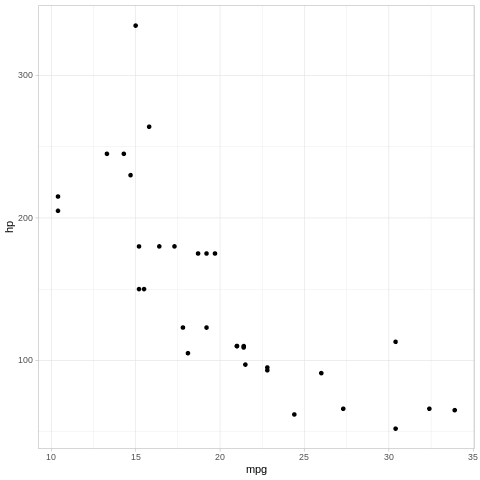

In [ ]:
%%R

pl + theme_light()

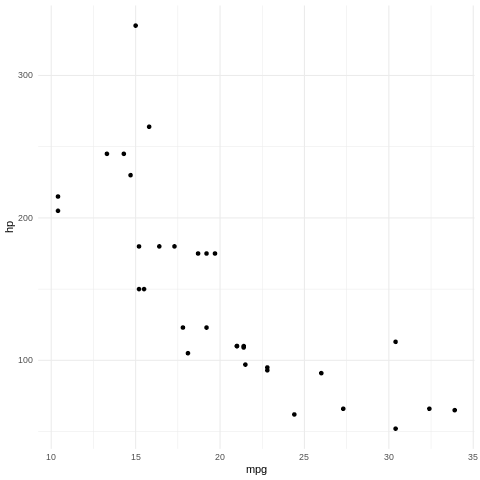

In [ ]:
%%R

pl + theme_minimal()

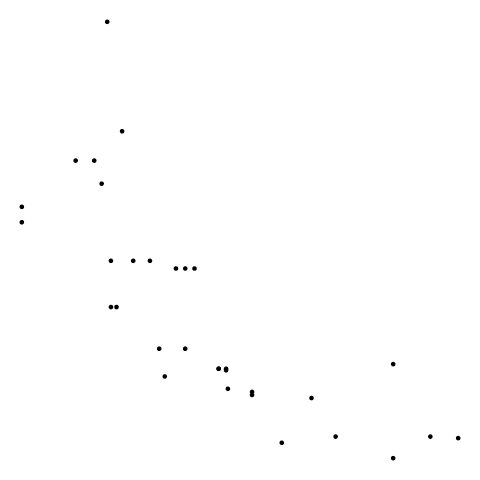

In [ ]:
%%R

pl + theme_void()